# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# your answer here-1st way
employee.groupby('Department').agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# your answer here-2nd way
pivote = pd.pivot_table(employee,
                    values='Salary',
                    index='Department',
                    aggfunc={'Salary':'mean'})
pivote

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [11]:
# your answer here
pd.pivot_table(employee,
                        values='Salary',
                        index='Department',
                        columns='Title',
                        aggfunc={'Salary':'mean'})


Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [12]:
# your answer here
pd.pivot_table(employee, index='Department', columns='Title', values=['Salary','Years'], aggfunc={'Salary':'mean', 'Years':'mean'})

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     3.0       NaN
IT           70.0    32.5      60.0   8.0     1.5       7.0
Sales         NaN     NaN      55.0   NaN     NaN       2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [14]:
# your answer here
pd.pivot_table(employee, values=['Salary','Name'], index='Department', columns='Title', aggfunc={'Salary':'mean','Name':'count'})

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [46]:
# your answer here
pivote = pd.pivot_table(employee, values='Salary', index=['Department','Title'], aggfunc={'Salary':['median', 'min', 'max', 'std', 'mean']})
pivote

max  mean  median  min       std
Department Title                                      
HR         VP          70  70.0    70.0   70       NaN
           analyst     35  32.5    32.5   30  3.535534
IT         VP          70  70.0    70.0   70       NaN
           analyst     35  32.5    32.5   30  3.535534
           associate   60  60.0    60.0   60       NaN
Sales      associate   55  55.0    55.0   55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [47]:
# No se pueden llenar los valores nulos de la tabla porque solamente hay una observación

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [19]:
# your answer here
pd.pivot_table(employee, 
                values=['Salary','Name'], 
                index='Department', 
                aggfunc={'Name':'count', 'Salary':'sum'} )

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [21]:
# your answer here
pd.pivot_table(employee, 
                values=['Salary','Years'], 
                index='Department',
                columns='Title', 
                aggfunc={'Years':'sum', 'Salary':'mean'} )

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [107]:
# your answer here--Your custom function here

## Add function to the agg

remove_max = employee.sort_values('Department')
remove_max = remove_max.drop(remove_max.groupby('Department').tail(1).index)
remove_max


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
6,Carlos,IT,Master,M,VP,8,70
4,Samuel,Sales,Master,M,associate,3,55


In [108]:
# your answer here
remove_max.groupby('Department')['Salary'].mean()

Department
HR       32.5
IT       45.0
Sales    55.0
Name: Salary, dtype: float64

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [68]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [69]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [70]:
# your answer here
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here
fitbit.corrwith(fitbit['Steps'])

Calorie burned            0.255305
Steps                     1.000000
Distance                  0.779678
Floors                    0.306511
Minutes Sedentary         0.076906
Minutes Lightly Active    0.393010
Minutes Fairly Active     0.303244
Minutes Very Active       0.571452
Activity Calories        -0.160568
MinutesOfSleep            0.130986
MinutesOfBeingAwake       0.124846
NumberOfAwakings          0.106591
LengthOfRestInMinutes     0.133405
dtype: float64

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

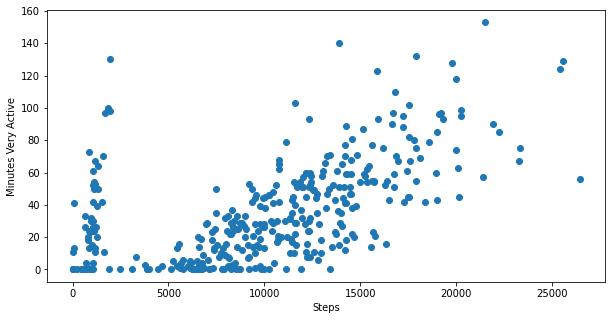

In [72]:
# your answer here
plt.figure(figsize=(10, 5))
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active');

#### What can you say about Minute Very Active and Steps? Write a comment below

In [73]:
# your comment here
# correlation is moderate

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [74]:
# your answer here
stats.pearsonr(fitbit['Steps'], fitbit['Minutes Sedentary'])

(0.07690608062990092, 0.14143690593737201)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

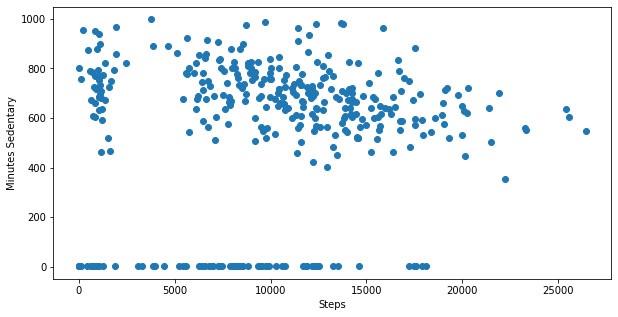

In [75]:
# your answer here
plt.figure(figsize=(10, 5))
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')

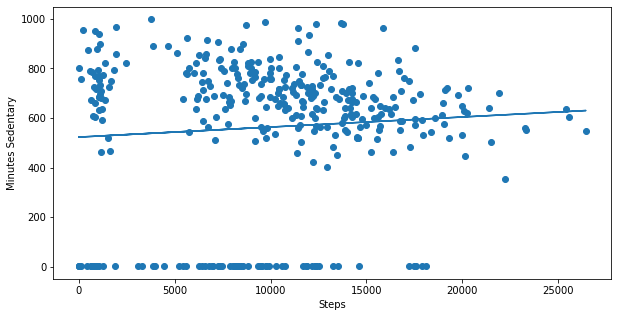

In [109]:
x = fitbit['Steps']
y = fitbit['Minutes Sedentary']
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [76]:
# your answer here
stats.pearsonr(fitbit['Steps'], fitbit['MinutesOfSleep'])

(0.13098565950836388, 0.012018728392520099)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

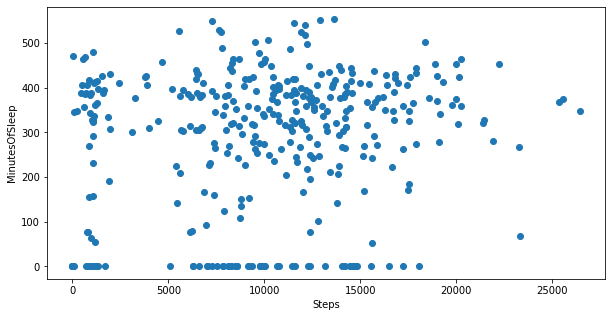

In [77]:
# your answer here
# your answer here
plt.figure(figsize=(10, 5))
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])
plt.xlabel('Steps')
plt.ylabel('MinutesOfSleep');

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [81]:
# your answer here
subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [83]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [85]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [86]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [89]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

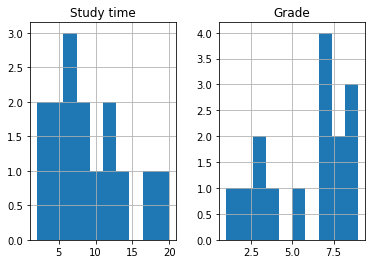

In [91]:
# your answer here
time_grades.hist();

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [92]:
# your answer here-Pearson 
time_grades.corr('pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [93]:
## your answer here-Spearman
time_grades.corr('spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
# Sí, existe una fuerte correlación entre dichas variables

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Grades')

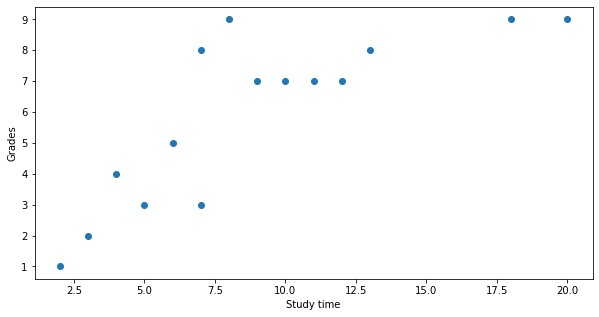

In [94]:
# your answer here
plt.figure(figsize=(10, 5))
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grades')

In [34]:
#your comment here
# there seems to be a correlation between both variables

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here


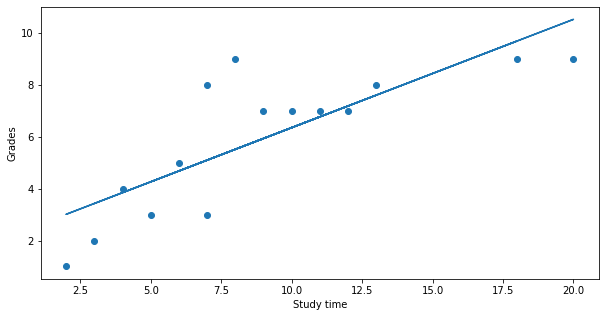

In [96]:
# your answer here
plt.figure(figsize=(10, 5))
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grades')
z = np.polyfit(time_grades['Study time'], time_grades['Grade'], 1)
p = np.poly1d(z)
plt.plot(time_grades['Study time'], p(time_grades['Study time']));